In [3]:
import pandas as pd

train_file_path = 'C:/Users/Admin/Desktop/Data/Train.csv'

train_data = pd.read_csv(train_file_path)

train_data.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
import re
import string

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  
    text = re.sub(r'\@\w+|\#','', text)  
    text = re.sub(r'\d+', '', text) 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.lower()  
    return text


train_data['tweet_text'] = train_data['tweet_text'].apply(lambda x: clean_text(str(x)))


train_data.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,i have a g iphone after hrs tweeting at rise...,iPhone,Negative emotion
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion
2,can not wait for ipad also they should sale ...,iPad,Positive emotion
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  


train_data['sentiment'] = train_data['tweet_text'].apply(get_sentiment)


train_data.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,sentiment
0,i have a g iphone after hrs tweeting at rise...,iPhone,Negative emotion,-0.6486
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion,0.9100
2,can not wait for ipad also they should sale ...,iPad,Positive emotion,0.0000
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion,0.7269
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion,0.6249


In [6]:

average_sentiment_per_brand = train_data.groupby('emotion_in_tweet_is_directed_at')['sentiment'].mean()


print(average_sentiment_per_brand)


emotion_in_tweet_is_directed_at
Android                            0.389110
Android App                        0.312381
Apple                              0.236641
Google                             0.307440
Other Apple product or service     0.434157
Other Google product or service    0.191956
iPad                               0.201566
iPad or iPhone App                 0.303673
iPhone                             0.153670
Name: sentiment, dtype: float64


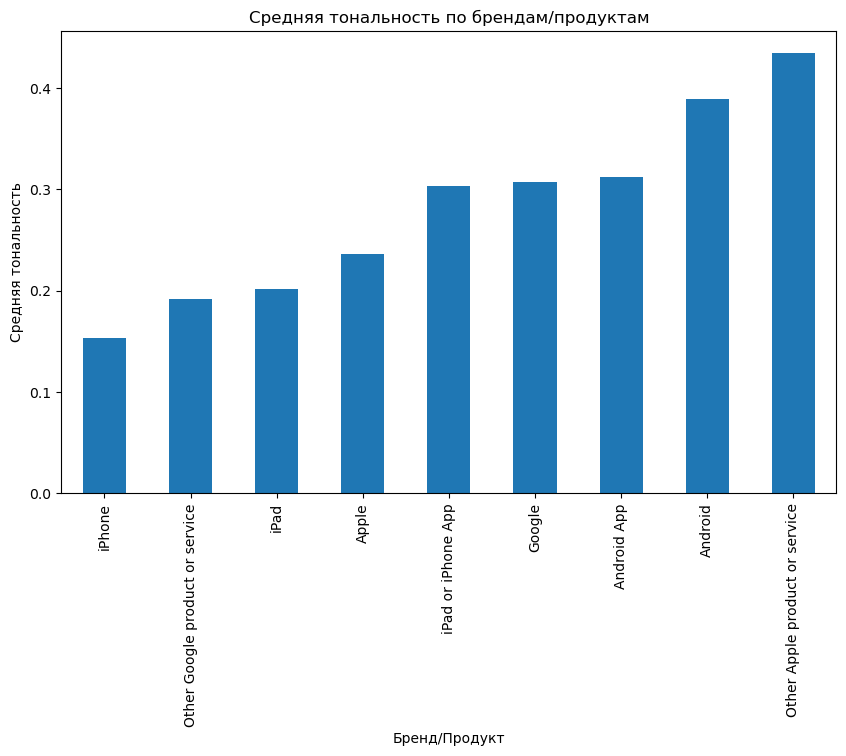

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация средней тональности для каждого бренда/продукта
plt.figure(figsize=(10, 6))
average_sentiment_per_brand.sort_values().plot(kind='bar')
plt.title('Средняя тональность по брендам/продуктам')
plt.xlabel('Бренд/Продукт')
plt.ylabel('Средняя тональность')
plt.show()


На основе проведенного анализа тональности твитов, связанных с различными брендами или продуктами, мы можем сделать несколько ключевых выводов:

Общее Восприятие Брендов:

Средняя тональность, рассчитанная для каждого бренда или продукта, дает представление о том, как они воспринимаются в социальных сетях. Бренды с положительной средней тональностью, вероятно, имеют более позитивное восприятие, в то время как бренды с отрицательной средней тональностью могут сталкиваться с некоторыми вызовами в восприятии пользователей.
Влияние на Маркетинг и Бренд-стратегию:

Эти результаты могут быть полезны для маркетинговых стратегий и управления репутацией бренда. Понимание общего настроения помогает компаниям адаптировать свои маркетинговые кампании и стратегии общения с клиентами.
Тренды и Инсайты:

Анализ тональности может выявить ключевые тренды и инсайты, такие как часто упоминаемые аспекты продуктов или услуг, которые вызывают положительные или отрицательные реакции.
Возможности для Улучшения:

Для брендов с отрицательной средней тональностью это может указывать на области, требующие улучшения, будь то качество продукта, обслуживание клиентов или общее восприятие.
Информированное Принятие Решений:

Данные и анализ могут помочь руководителям и аналитикам принимать более информированные решения, касающиеся развития продукта, клиентского обслуживания и бренд-коммуникаций.
Заключение
Анализ тональности социальных медиа предоставляет ценные данные о восприятии брендов и продуктов. Это позволяет компаниям лучше понимать своих клиентов и адаптировать свои стратегии для улучшения взаимодействия с клиентами и укрепления своего бренда.